# Clase II

Copiamos la carpeta de imágenes desde el repositorio

In [1]:
!git clone https://github.com/rollervan/FunMat.git temp
!cp -r ./temp/Codes/Images ./
!rm -rf ./temp

Cloning into 'temp'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 94 (delta 21), reused 85 (delta 14), pack-reused 0
Receiving objects: 100% (94/94), 11.38 MiB | 10.12 MiB/s, done.
Resolving deltas: 100% (21/21), done.


Definicion vectores en 2D


In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
orig = np.zeros([5,2])
v_1 = np.array([[1],[0]])
v_2 = np.array([[1],[1]])
n_1 = np.array([[-1],[1]])
n_2 = np.array([[0],[2]])
u_1 = np.array([[3],[7]])

u = np.concatenate([v_1, v_2, n_1, n_2, u_1], axis=1).transpose()
plt.figure()
plt.quiver(orig[:,0], orig[:,1], u[:,0], u[:,1], 
           angles='xy', scale_units='xy', scale=1, 
           color=['r', 'g', 'b', 'c', 'k'])

plt.xlim(-2,4)
plt.ylim(-1,8)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Definicion vectores en 3D


In [4]:
orig = np.asarray([0,0,0]).reshape(3,1)
u=np.asarray([-4,2,-1]).reshape(3,1)
v=np.asarray([2,-1,1/2]).reshape(3,1)
w=np.asarray([0,1,2]).reshape(3,1)
r=np.asarray([-2,-1,-1]).reshape(3,1)

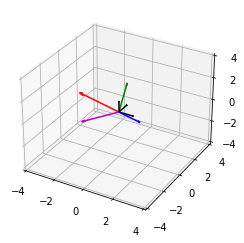

In [5]:
ax = plt.figure().add_subplot(projection='3d')
ax.quiver(orig[0], orig[1], orig[2], u[0], u[1], u[2], length=1, arrow_length_ratio=0.1, color='r')
ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2], length=1, arrow_length_ratio=0.1, color='b')
ax.quiver(orig[0], orig[1], orig[2], w[0], w[1], w[2], length=1, arrow_length_ratio=0.1, color='g')
ax.quiver(orig[0], orig[1], orig[2], r[0], r[1], r[2], length=1, arrow_length_ratio=0.1, color='m')

ax.quiver(orig[0], orig[1], orig[2], [1], [0], [0], length=1, arrow_length_ratio=0.1, color='k')
ax.quiver(orig[0], orig[1], orig[2], [0], [1], [0], length=1, arrow_length_ratio=0.1, color='k')
ax.quiver(orig[0], orig[1], orig[2], [0], [0], [1], length=1, arrow_length_ratio=0.1, color='k')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(-4,4)
plt.show()

# 2.1.1. Dependencia e Independencia Lineal 
Ejercicio 2.1 estudiar independencia lineal

* Para esta sección utilizaremos la librería de cómputo simbólico ```sympy```

In [55]:
from sympy import *
from IPython.display import Math, display

v_1=[1,-1,0] # definimos los vectores fila 
v_2=[0,1,2]
v_3=[1,0,2]

A = Matrix([v_1, v_2, v_3]).transpose() # por eso transponemos la matriz
A


Matrix([
[ 1, 0, 1],
[-1, 1, 0],
[ 0, 2, 2]])

In [ ]:
Matrix([1, -1,0])

Matrix([
[ 1],
[-1],
[ 0]])

In [58]:
x, y, z = symbols("x y z")
X = Matrix([x, y, z]) # Creamos una matriz (vector columna) de símbolos
A*X # Actuación del operador matricial 

Matrix([
[    x + z],
[   -x + y],
[2*y + 2*z]])

Aplicamos el algoritmo de reducción a forma escalonada por filas (Gauss)

In [8]:
A = Matrix(A)
A_red, _ = A.rref()
A_red

Matrix([
[1, 0, 1],
[0, 1, 1],
[0, 0, 0]])

Puesto que ```A_red``` tiene 2 filas distintas de cero, el rango de ```A``` es 2. Tiene 2 vectores linealmente independientes.

# 2.1.2. Sistemas de Generadores, Bases y Bases Ortogonales
Ejercicio 2.2 extraer una base

In [9]:
u1 = [4, -5, 7]
u2 = [2, -3, 4]
u3 = [1, 1, -2]
u4 = [2, -1, 1]

M = Matrix([u1, u2, u3, u4]).transpose()
A_red = M.rref()[0]
A_red 

Matrix([
[1, 0, 0, 1/3],
[0, 1, 0,   0],
[0, 0, 1, 2/3]])

 Coeficientes de la combinación lineal:

In [10]:
c = A_red[:,3] # selecciono la columna con los coeficientes de u_4 en la base
c

Matrix([
[1/3],
[  0],
[2/3]])

En efecto, se verifica:

In [11]:
res = c[0]*Matrix(u1) + c[1]*Matrix(u2) + c[2]*Matrix(u3) - Matrix(u4) # debe ser cero
res

Matrix([
[0],
[0],
[0]])

# Ejercicio 2.3

Dimension del Subespacio Generado por 2 vectores:

In [12]:
u_1 = [-1, 1, 0]
u_2 = [ 0, 1, 1]
A = Matrix([u_1, u_2])
rango = A.rank()
rango

2

# 2.1.2 Cambio de base

Ejemplo

In [13]:
e1 = [1, 0] # primer vector base canonica Bc
e2 = [0, 1] # segundo vector base canonica Bc
b11 = [1, 0] # [-1, 1]'%[1, 0]' % primer vector base B1
b12 = [1, 1] # [2, 0]'%[1, 1]' % segundo vector base B1
b21 = [-1, 1] # [1, 1]'%[-1, 1]' % primer vector base B2
b22 = [0, 2] # [0, -1]' %[0, 2]' % segundo vector base B2

In [14]:
B_C = Matrix([e1, e2]).transpose()
B_1 = Matrix([b11, b12]).transpose()
B_2 = Matrix([b21, b22]).transpose()
x = Matrix([2, 2]) # coordenadas en BC

In [15]:
B_C

Matrix([
[1, 0],
[0, 1]])

In [16]:
B_1

Matrix([
[1, 1],
[0, 1]])

In [17]:
B_2

Matrix([
[-1, 0],
[ 1, 2]])

ciclo Bc->B1->B2->Bc

In [18]:
P_1 = B_1.inv() # matriz de paso Bc -> B1
P_2 = B_2.inv()*B_1 # matriz de paso B1 -> B2
P_3 = B_2 # matriz de paso B2 -> Bc

In [19]:
P_1

Matrix([
[1, -1],
[0,  1]])

In [20]:
P_2

Matrix([
[ -1, -1],
[1/2,  1]])

In [21]:
P_3

Matrix([
[-1, 0],
[ 1, 2]])

Coordenadas en $B_1$: $B_1 y_{B1}=x_{BC}$ que es $Py=x$ luego $y=P^-1 x$

* Nótese: $y_{B1}$ es el vector $x_{BC}$ visto desde la base $B_1$


In [ ]:
# MATLAB y_B1 = B_1\x # P=M(B_C,B1) como me escribo los vectores de BV en BC

y_B1 = B_1.solve(x) # por defecto usa eliminación Gauss-Jordan
y_B1 = B_1.LUsolve(x)
y_B1 = B_1.QRsolve(x)
y_B1 = B_1.inv()*x
y_B1 = B_1.pinv()*x
y_B1

In [ ]:
#verifica
residuo=(B_1*y_B1-x).norm()
residuo

Coordenadas en B_2

In [ ]:
y_B2 = B_2.solve(x)
# verifica
residuo = (B_2*y_B2-x).norm()
residuo

Matriz de paso B1 a B2

In [ ]:
# P=M(B1,B2) como me escribo los vectores de B1 en B2
p1 = B_2.solve(Matrix(b11))
p2 = B_2.solve(Matrix(b12))
P = p1.row_join(p2) # P = [p1, p2]
P

In [ ]:
Y = P*y_B2 # pasa (proyecta) las coordenadas de B1 a B2
Y

Resolucion directa 

In [27]:
PP = B_2.solve(B_1 )
PP

Matrix([
[ -1, -1],
[1/2,  1]])

# Ejercicio 2.5

In [28]:
v1 = [1, 0] # primer vector base BV
v2 = [1, 1] # segundo vector base BV
n1 = [-1, 1] # primer vector base BN
n2 = [0, 2] # segundo vector base BN
B_V = Matrix([v1, v2]).transpose() # matriz de paso BC a BV
B_N = Matrix([n1, n2]).transpose() # matriz de paso BC a BN
x = Matrix([3, 7]) # coordenadas en BC

Coordenadas en $B_V$: $B_V y_{B_V}=x_{BC}$ que es $Py=x$ luego $y=P^{-1}x$

In [29]:
y_BV = B_V.solve(x) # P=M(B_C,BV) como me escribo los vectores de BV en BC
y_BV

Matrix([
[-4],
[ 7]])

Coordenadas en $B_N$

In [30]:
y_BN = B_N.solve(x)
y_BN

Matrix([
[-3],
[ 5]])

Matriz de paso BV a BN
* $P=M(BV,BN)$ como me escribo los vectores de BN en BV

In [31]:
p1 = B_N.solve(Matrix(v1))
p2 = B_N.solve(Matrix(v2))
P = p1.row_join(p2) # P = [p1, p2]
Y = P*y_BV # pasa (proyecta) las coordenadas de BV a BN
Y

Matrix([
[-3],
[ 5]])

Resolución directa

In [32]:
PP = B_N.solve(B_V)
PP

Matrix([
[ -1, -1],
[1/2,  1]])

# Ejercicio

In [33]:
n = 2
A = np.random.randn(n,n) # genero la matriz
B = (1/2)*(A+A.transpose()) # la simetrizo
eigvals, V = np.linalg.eig(B) # clasifico la matriz
det = np.linalg.det(B) # compruebo que no es singular luego es una base
x = np.random.randn(n,1) # coordenadas en el sistema canonico
y = Matrix(V).LUsolve(Matrix(x)) #coordenadas en el nuevo sistema.
res = V*y-x
norm_res = res.norm()
norm_res

0

In [34]:
Matrix(eigvals)

Matrix([
[  1.7266257860755],
[-1.08761383170222]])

In [35]:
Matrix(V)

Matrix([
[ 0.998988276446011, 0.044971363370792],
[-0.044971363370792, 0.998988276446011]])

# 2.1.3. Espacio Imagen y Núcleo 

In [36]:
# Calcular base ortonormal
A = Matrix([[1, 2, 3],
            [1, 2, 3],
            [1, 2, 3]])
A

Matrix([
[1, 2, 3],
[1, 2, 3],
[1, 2, 3]])

In [37]:
Z = A.nullspace()
Z_mat = Z[0].row_join(Z[1])
Z_mat

Matrix([
[-2, -3],
[ 1,  0],
[ 0,  1]])

Compruebo que los vectores de Z estan en el kernel 

In [38]:
A*Z_mat

Matrix([
[0, 0],
[0, 0],
[0, 0]])

Base ortonormal

In [39]:
Z_orthonormal = GramSchmidt(Z, orthonormal=True)
Z_orthonormal_mat = Z_orthonormal[0].row_join(Z_orthonormal[1])
Z_orthonormal_mat

Matrix([
[-2*sqrt(5)/5, -3*sqrt(70)/70],
[   sqrt(5)/5, -3*sqrt(70)/35],
[           0,    sqrt(70)/14]])

Otro ejemplo

In [40]:
A = Matrix([[1, -2, 0],
            [0, 0, 0],
            [2, -4, 0]])

rango = A.rank()
kernel = A.nullspace()

print('Rango:'+str(rango))
# Mostramos todos los vectores del núcleo (kernel es una lista de ellos dados por A.nullspace())
for i in kernel:
    display(i)
    
kernel_mat = kernel[0].row_join(kernel[1])
kernel_ortonormal = GramSchmidt(kernel, orthonormal=True)
kernel_ortonormal_mat = kernel_ortonormal[0].row_join(kernel_ortonormal[1])

kernel_ortonormal_mat


Rango:1


Matrix([
[2],
[1],
[0]])

Matrix([
[0],
[0],
[1]])

Matrix([
[2*sqrt(5)/5, 0],
[  sqrt(5)/5, 0],
[          0, 1]])

In [41]:
A.rref()[0]

Matrix([
[1, -2, 0],
[0,  0, 0],
[0,  0, 0]])

In [42]:
GramSchmidt([A[:,0]], orthonormal=True)[0]

Matrix([
[  sqrt(5)/5],
[          0],
[2*sqrt(5)/5]])

Otro ejemplo

In [43]:
A = Matrix([[1, 2, 0],
            [0, 0, 0],
            [2, -4, 0]])

rango = A.rank()
kernel = A.nullspace()

print('Rango:'+str(rango))
# Mostramos todos los vectores del núcleo (kernel es una lista de ellos dados por A.nullspace())
for i in kernel:
    display(i)


Rango:2


Matrix([
[0],
[0],
[1]])

En este caso tenemos $A^{m x n}$ donde $m = n = 3$.

El rango de $A$ es 2, que corresponde a la dimensión del espacio imagen de la matriz: $dim(\mathcal{R}(A))=2$

El núcleo de $A$ solo tiene 1 vector: $\left[\begin{matrix}0\\0\\1\end{matrix}\right]$, por tanto la dimensión del núcleo $dim(\mathcal{N}(A))=1$

En efecto, esto cumple la condición del teorema de la dimensión:

$\underbrace{n}_{3} = \underbrace{dim(\mathcal{R}(A))}_{2} + \underbrace{dim(\mathcal{N}(A))}_{1}$

# 2.1.4 Normas

## Normas Vectoriales

In [44]:
u = np.array([-1, 2, 0, -4])
norma2 = np.linalg.norm(u, ord=2)
norma1 = np.linalg.norm(u, ord=1)
norma_inf = np.linalg.norm(u, ord=np.inf)

print('Norma 2:' + str(norma2))
print('Norma 1:' + str(norma1))
print('Norma infinito:' + str(norma_inf))

Norma 2:4.58257569495584
Norma 1:7.0
Norma infinito:4.0


## Normas Matriciales

In [45]:
A= np.array([[-1, 2, 0],[-4, 2, 0]])

norma2 = np.linalg.norm(A, ord=2)
norma1 = np.linalg.norm(A, ord=1)
norma_inf = np.linalg.norm(A, ord=np.inf)
norma_fro = np.linalg.norm(A, ord='fro')

norma2_A_vectorizada = np.linalg.norm(A.flatten(), ord=2)

print('Norma 2:' + str(norma2))
print('Norma 1:' + str(norma1))
print('Norma infinito:' + str(norma_inf))
print('Norma frobenius:' + str(norma_fro))
print('Norma 2 de A vectorizada:' + str(norma2_A_vectorizada))

Norma 2:4.844156902881103
Norma 1:5.0
Norma infinito:6.0
Norma frobenius:5.0
Norma 2 de A vectorizada:5.0


# Ejercicio 1.10 calculo de la energia

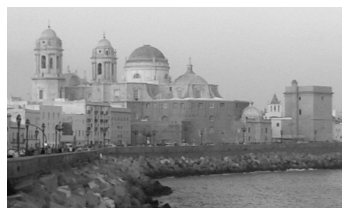

Norma 1 Imagen: 871.19
Norma 2 Imagen: 1040.17
Norma Inf Imagen: 1894.13
Norma Frobenius Imagen: 1048.64

Energía 1 Imagen: 871.19
Energía 2 Imagen: 540977.95
Energía Inf Imagen: 1894.13
Energía Frobenius Imagen: 1048.64


In [46]:
from PIL import Image

path_to_image = './Images/cadiz2015.jpg'
im = Image.open(path_to_image)
im_bw = im.convert('L') # https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert
plt.imshow(im_bw, cmap="gray")
plt.axis('off')
plt.show()

I = np.asarray(im_bw)/255.0 # pasamos a numpy.array y al rango [0, 1]

norma_imagen_1 = np.linalg.norm(I, ord=1)
norma_imagen_2 = np.linalg.norm(I, ord=2)
norma_imagen_inf = np.linalg.norm(I, ord=np.inf)
norma_imagen_fro = np.linalg.norm(I, ord='fro')

print("Norma 1 Imagen: {:.02f}".format(norma_imagen_1))
print("Norma 2 Imagen: {:.02f}".format(norma_imagen_2))
print("Norma Inf Imagen: {:.02f}".format(norma_imagen_inf))
print("Norma Frobenius Imagen: {:.02f}".format(norma_imagen_fro))


energia_imagen_1 = np.linalg.norm(I, ord=1) #%sum(I(:).^2) %sqrt(sum(I(:).^2)) CORREGIR
energia_imagen_2 = (1/2)*np.linalg.norm(I, ord=2)**2
energia_imagen_inf = np.linalg.norm(I, np.inf) 
energia_imagen_fro = np.linalg.norm(I,'fro') 
print('')
print("Energía 1 Imagen: {:.02f}".format(energia_imagen_1))
print("Energía 2 Imagen: {:.02f}".format(energia_imagen_2))
print("Energía Inf Imagen: {:.02f}".format(energia_imagen_inf))
print("Energía Frobenius Imagen: {:.02f}".format(energia_imagen_fro))